In [13]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [14]:
X_train.shape, X_test.shape

((750, 2), (250, 2))

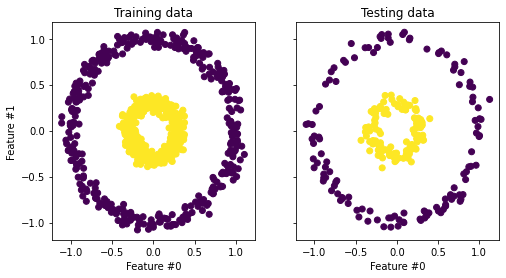

In [15]:


_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [20]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

X_test_kernel_pca.shape, X_test_pca.shape

((250, 368), (250, 2))

In [24]:
explainedVar = np.var(kernel_pca.fit_transform(X_train), axis = 0) / np.sum(np.var(kernel_pca.fit_transform(X_train), axis = 0), axis = 0)
explainedVar[explainedVar>=0.01]

array([0.12032115, 0.11128738, 0.10934022, 0.04891522, 0.04726694,
       0.04706895, 0.04670234, 0.04436233, 0.04098771, 0.03806492,
       0.03655529, 0.03231207, 0.03031057, 0.02601491, 0.02392825,
       0.01888292, 0.01847782, 0.01533838, 0.01403949, 0.01396118,
       0.0128891 ])

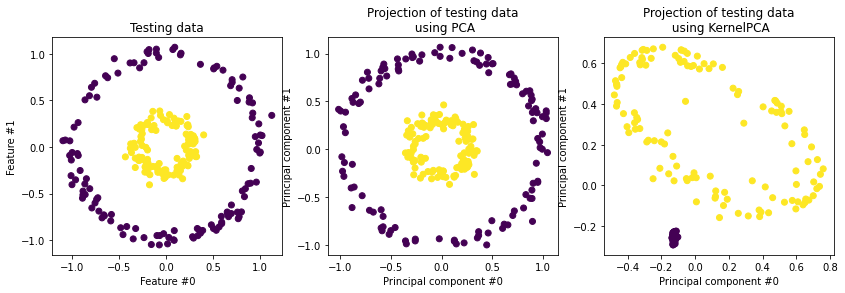

In [31]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [41]:
np.corrcoef(X_test.T), np.sum((X_test[:, 0] - np.mean(X_test[:, 0])) * (X_test[:, 1] - np.mean(X_test[:, 1]))) / (np.sum((X_test[:, 0] - np.mean(X_test[:, 0]))**2) * np.sum((X_test[:, 1] - np.mean(X_test[:, 1]))**2))

(array([[1.        , 0.01737072],
        [0.01737072, 1.        ]]),
 0.0002580497193924763)